# ETL

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statistics as st
from scipy.stats import zscore

In [6]:
df = pd.read_csv('CarDekho.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [7]:
df.nunique().sort_values()

Transmission             2
Drivetrain               3
Seller Type              3
Owner                    6
Seating Capacity         6
Fuel Type                9
Color                   17
Year                    22
Make                    33
Fuel Tank Capacity      55
Location                77
Engine                 108
Width                  170
Height                 196
Length                 248
Max Torque             290
Max Power              335
Price                  619
Kilometer              847
Model                 1050
dtype: int64

## Tratamiento de nulls
La cantidad de valores nules para cada columna no supera el 6% del total de ejemplos

In [8]:
# cantidad de nulos en cada columna
df_sum_nan = df.isna().sum().reset_index()
df_sum_nan.columns = ['variables', 'sum_of_nan']
df_sum_nan = df_sum_nan.query('sum_of_nan > 0')
df_sum_nan['proportion_of_nan'] = 100*df_sum_nan['sum_of_nan'] / df.shape[0]
df_sum_nan

,variables,sum_of_nan,proportion_of_nan
11,Engine,80,3.885381
12,Max Power,80,3.885381
13,Max Torque,80,3.885381
14,Drivetrain,136,6.605148
15,Length,64,3.108305
16,Width,64,3.108305
17,Height,64,3.108305
18,Seating Capacity,64,3.108305
19,Fuel Tank Capacity,113,5.488101


### Eliminandolos
Se eliminan 185 ejemplos del dataframe que corresponde a ~9% del total de ejemplos

In [9]:
df_not_null = df.dropna()
df_not_null.to_csv('datasets/CarDekho_not_null.csv', index=False)
df_not_null.head(10)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0
10,Hyundai,Elite i20 Sportz 1.2,591000,2017,20281,Petrol,Manual,Mumbai,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0


### Rellenando con la media y la moda
- Para variables categoricas llenar los valores faltantes con la moda
    - Engine, Max Power, Max Torque, Drivetraing, Seating Capacity
- Para variables continuas llenar con la media
    - Length, Widht, Height, Fuel Tank Capacity 

In [10]:
df_fill = df.copy()

engine_mode = st.mode(df_fill['Engine'])
max_power_mode = st.mode(df_fill['Max Power'])
max_torque_mode = st.mode(df_fill['Max Torque'])
drivetrain_mode = st.mode(df_fill['Drivetrain'])
seating_capacity_mode = st.mode(df_fill['Seating Capacity'])
length_mean = np.mean(df_fill['Length'])
width_mean = np.mean(df_fill['Width'])
height_mean = np.mean(df_fill['Height'])
fuel_tank_capacity_mean = np.mean(df_fill['Fuel Tank Capacity'])

df_fill.fillna(value={
    'Engine': engine_mode,
    'Max Power': max_power_mode,
    'Max Torque': max_torque_mode,
    'Drivetrain': drivetrain_mode,
    'Seating Capacity': seating_capacity_mode,
    'Length': length_mean,
    'Width': width_mean,
    'Height': height_mean,
    'Fuel Tank Capacity': fuel_tank_capacity_mean
}, inplace=True)
df_fill.to_csv('datasets/CarDekho_filled.csv', index=False)


## Manejo de variables categoricas

- Separar las variables categoricas con n valores en n variables,
- Para cada ejemplo, si su atributo pertenecía a la categoría que corresponde a la variable, le asignaremos 1. De otra forma, le asignaremos 0. 


Las variables aleatorias a las cuales se realazara este proceso 

- Transmission
- Owner
- Seller Type
- Drivetrain
- Seating Capacity

In [11]:
df['dummy_cat'] = 1
pd.pivot_table(df, values='dummy_cat', columns=['Transmission'], index=['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
                                                                        'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
                                                                        'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
                                                                        'Seating Capacity', 'Fuel Tank Capacity'],
                                                                        fill_value=0, aggfunc='count').reset_index()

Transmission,Make,Model,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,Manual
0,Audi,A3 35 TDI Premium,1800000,2014,76529,Diesel,Pune,Blue,First,Individual,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0
1,Audi,A3 35 TDI Premium,2600000,2017,64000,Diesel,Chennai,Blue,First,Individual,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0
2,Audi,A3 35 TDI Premium,2900000,2019,15529,Diesel,Mumbai,White,First,Individual,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0
3,Audi,A3 35 TDI Premium,2950000,2020,11000,Diesel,Pune,White,First,Individual,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0
4,Audi,A3 35 TDI Premium + Sunroof,2900000,2019,15530,Diesel,Goa,White,First,Individual,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Volvo,XC40 D4 R-Design,3950000,2018,52000,Diesel,Bangalore,White,First,Individual,...,190 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4425.0,1863.0,1652.0,5.0,54.0,1,0
1870,Volvo,XC40 T4 R-Design,4400000,2020,16519,Petrol,Mumbai,White,First,Corporate,...,187 bhp @ 5000 rpm,300 Nm @ 1300 rpm,FWD,4425.0,1863.0,1652.0,5.0,54.0,1,0
1871,Volvo,XC60 Inscription,1950000,2016,79000,Diesel,Ahmedabad,White,First,Individual,...,215 bhp @ 4000 rpm,440 Nm @ 1500 rpm,AWD,4644.0,1891.0,1713.0,5.0,70.0,1,0
1872,Volvo,XC60 Inscription [2017-2020],5800000,2019,3500,Diesel,Ludhiana,White,First,Individual,...,235 bhp @ 4250 rpm,480 Nm @ 1750 rpm,AWD,4688.0,1902.0,1658.0,5.0,71.0,1,0


In [12]:
pd.pivot_table(df, values='dummy_cat', columns=['Seller Type'], index=['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 
                                                                       'Transmission', 'Location', 'Color', 'Owner', 'Engine',
                                                                       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
                                                                       'Fuel Tank Capacity'],
                                                                        fill_value=0, aggfunc='count').reset_index()

Seller Type,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Fuel Tank Capacity,Commercial Registration,Corporate,Individual
0,Audi,A3 35 TDI Premium,1800000,2014,76529,Diesel,Automatic,Pune,Blue,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,50.0,0,0,1
1,Audi,A3 35 TDI Premium,2600000,2017,64000,Diesel,Automatic,Chennai,Blue,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,50.0,0,0,1
2,Audi,A3 35 TDI Premium,2900000,2019,15529,Diesel,Automatic,Mumbai,White,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,50.0,0,0,1
3,Audi,A3 35 TDI Premium,2950000,2020,11000,Diesel,Automatic,Pune,White,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,50.0,0,0,1
4,Audi,A3 35 TDI Premium + Sunroof,2900000,2019,15530,Diesel,Automatic,Goa,White,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,50.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Volvo,XC40 D4 R-Design,3950000,2018,52000,Diesel,Automatic,Bangalore,White,First,...,190 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4425.0,1863.0,1652.0,54.0,0,0,1
1870,Volvo,XC40 T4 R-Design,4400000,2020,16519,Petrol,Automatic,Mumbai,White,First,...,187 bhp @ 5000 rpm,300 Nm @ 1300 rpm,FWD,4425.0,1863.0,1652.0,54.0,0,1,0
1871,Volvo,XC60 Inscription,1950000,2016,79000,Diesel,Automatic,Ahmedabad,White,First,...,215 bhp @ 4000 rpm,440 Nm @ 1500 rpm,AWD,4644.0,1891.0,1713.0,70.0,0,0,1
1872,Volvo,XC60 Inscription [2017-2020],5800000,2019,3500,Diesel,Automatic,Ludhiana,White,First,...,235 bhp @ 4250 rpm,480 Nm @ 1750 rpm,AWD,4688.0,1902.0,1658.0,71.0,0,0,1


In [13]:
pd.pivot_table(df, values='dummy_cat', columns=['Owner'], index=['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
                                                                 'Transmission', 'Location', 'Color', 'Seller Type', 'Engine',
                                                                 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
                                                                 'Seating Capacity', 'Fuel Tank Capacity'],
                                                                        fill_value=0, aggfunc='count').reset_index()

Owner,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,First,Second,Third,UnRegistered Car
0,Audi,A3 35 TDI Premium,1800000,2014,76529,Diesel,Automatic,Pune,Blue,Individual,...,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0,0,0
1,Audi,A3 35 TDI Premium,2600000,2017,64000,Diesel,Automatic,Chennai,Blue,Individual,...,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0,0,0
2,Audi,A3 35 TDI Premium,2900000,2019,15529,Diesel,Automatic,Mumbai,White,Individual,...,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0,0,0
3,Audi,A3 35 TDI Premium,2950000,2020,11000,Diesel,Automatic,Pune,White,Individual,...,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0,0,0
4,Audi,A3 35 TDI Premium + Sunroof,2900000,2019,15530,Diesel,Automatic,Goa,White,Individual,...,FWD,4456.0,1796.0,1416.0,5.0,50.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Volvo,XC40 D4 R-Design,3950000,2018,52000,Diesel,Automatic,Bangalore,White,Individual,...,AWD,4425.0,1863.0,1652.0,5.0,54.0,1,0,0,0
1870,Volvo,XC40 T4 R-Design,4400000,2020,16519,Petrol,Automatic,Mumbai,White,Corporate,...,FWD,4425.0,1863.0,1652.0,5.0,54.0,1,0,0,0
1871,Volvo,XC60 Inscription,1950000,2016,79000,Diesel,Automatic,Ahmedabad,White,Individual,...,AWD,4644.0,1891.0,1713.0,5.0,70.0,1,0,0,0
1872,Volvo,XC60 Inscription [2017-2020],5800000,2019,3500,Diesel,Automatic,Ludhiana,White,Individual,...,AWD,4688.0,1902.0,1658.0,5.0,71.0,1,0,0,0


In [14]:
pd.pivot_table(df, values='dummy_cat', columns=['Drivetrain'], index=['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
                                                                      'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
                                                                      'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
                                                                      'Seating Capacity', 'Fuel Tank Capacity'],
                                                                       fill_value=0, aggfunc='count').reset_index()

Drivetrain,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,AWD,FWD,RWD
0,Audi,A3 35 TDI Premium,1800000,2014,76529,Diesel,Automatic,Pune,Blue,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,4456.0,1796.0,1416.0,5.0,50.0,0,1,0
1,Audi,A3 35 TDI Premium,2600000,2017,64000,Diesel,Automatic,Chennai,Blue,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,4456.0,1796.0,1416.0,5.0,50.0,0,1,0
2,Audi,A3 35 TDI Premium,2900000,2019,15529,Diesel,Automatic,Mumbai,White,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,4456.0,1796.0,1416.0,5.0,50.0,0,1,0
3,Audi,A3 35 TDI Premium,2950000,2020,11000,Diesel,Automatic,Pune,White,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,4456.0,1796.0,1416.0,5.0,50.0,0,1,0
4,Audi,A3 35 TDI Premium + Sunroof,2900000,2019,15530,Diesel,Automatic,Goa,White,First,...,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,4456.0,1796.0,1416.0,5.0,50.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Volvo,XC40 D4 R-Design,3950000,2018,52000,Diesel,Automatic,Bangalore,White,First,...,190 bhp @ 4000 rpm,400 Nm @ 1750 rpm,4425.0,1863.0,1652.0,5.0,54.0,1,0,0
1870,Volvo,XC40 T4 R-Design,4400000,2020,16519,Petrol,Automatic,Mumbai,White,First,...,187 bhp @ 5000 rpm,300 Nm @ 1300 rpm,4425.0,1863.0,1652.0,5.0,54.0,0,1,0
1871,Volvo,XC60 Inscription,1950000,2016,79000,Diesel,Automatic,Ahmedabad,White,First,...,215 bhp @ 4000 rpm,440 Nm @ 1500 rpm,4644.0,1891.0,1713.0,5.0,70.0,1,0,0
1872,Volvo,XC60 Inscription [2017-2020],5800000,2019,3500,Diesel,Automatic,Ludhiana,White,First,...,235 bhp @ 4250 rpm,480 Nm @ 1750 rpm,4688.0,1902.0,1658.0,5.0,71.0,1,0,0


In [15]:
pd.pivot_table(df, values='dummy_cat', columns=['Seating Capacity'], index=['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 
                                                                            'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
                                                                            'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
                                                                            'Fuel Tank Capacity'],
                                                                       fill_value=0, aggfunc='count').reset_index()

Seating Capacity,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Fuel Tank Capacity,2.0,4.0,5.0,6.0,7.0,8.0
0,Audi,A3 35 TDI Premium,1800000,2014,76529,Diesel,Automatic,Pune,Blue,First,...,4456.0,1796.0,1416.0,50.0,0,0,1,0,0,0
1,Audi,A3 35 TDI Premium,2600000,2017,64000,Diesel,Automatic,Chennai,Blue,First,...,4456.0,1796.0,1416.0,50.0,0,0,1,0,0,0
2,Audi,A3 35 TDI Premium,2900000,2019,15529,Diesel,Automatic,Mumbai,White,First,...,4456.0,1796.0,1416.0,50.0,0,0,1,0,0,0
3,Audi,A3 35 TDI Premium,2950000,2020,11000,Diesel,Automatic,Pune,White,First,...,4456.0,1796.0,1416.0,50.0,0,0,1,0,0,0
4,Audi,A3 35 TDI Premium + Sunroof,2900000,2019,15530,Diesel,Automatic,Goa,White,First,...,4456.0,1796.0,1416.0,50.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Volvo,XC40 D4 R-Design,3950000,2018,52000,Diesel,Automatic,Bangalore,White,First,...,4425.0,1863.0,1652.0,54.0,0,0,1,0,0,0
1870,Volvo,XC40 T4 R-Design,4400000,2020,16519,Petrol,Automatic,Mumbai,White,First,...,4425.0,1863.0,1652.0,54.0,0,0,1,0,0,0
1871,Volvo,XC60 Inscription,1950000,2016,79000,Diesel,Automatic,Ahmedabad,White,First,...,4644.0,1891.0,1713.0,70.0,0,0,1,0,0,0
1872,Volvo,XC60 Inscription [2017-2020],5800000,2019,3500,Diesel,Automatic,Ludhiana,White,First,...,4688.0,1902.0,1658.0,71.0,0,0,1,0,0,0


## Normalizacion
En el grafico de caja se puede ver que la escala de Price es mayor a todas las demas variables.

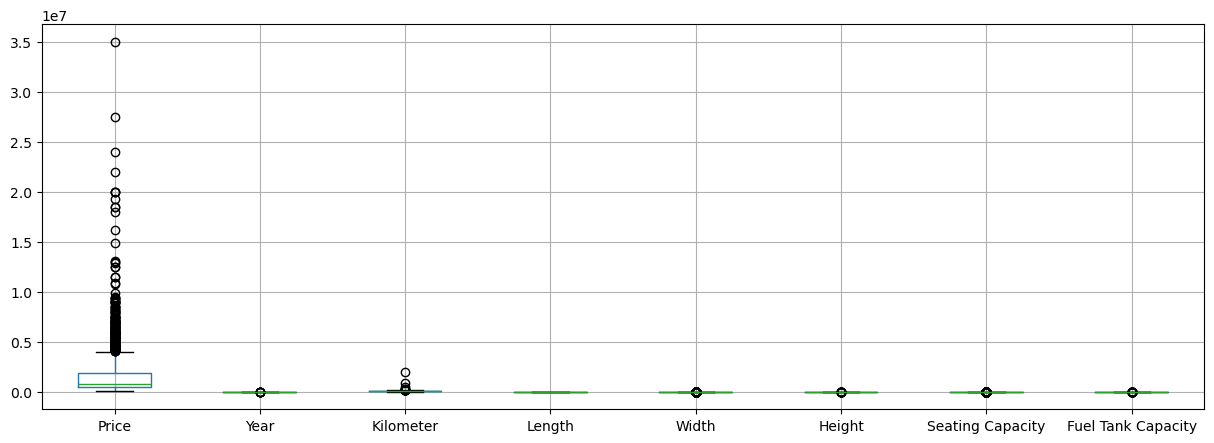

In [16]:
df_fill.boxplot(figsize=(15,5))
plt.show()

In [17]:
def normalize(col: pd.Series, apply_zscore: bool = False) -> pd.Series:
    x_min = col.min()
    x_max = col.max()

    if apply_zscore:
        return zscore(col)
    return (col - x_min)/(x_max - x_min)

def normalize_df(df: pd.DataFrame) -> pd.DataFrame:
    df['Price'] = normalize(df['Price'])
    df['Year'] = normalize(df['Year'])
    df['Kilometer'] = normalize(df['Kilometer'])
    df['Length'] = normalize(df['Length'])
    df['Width'] = normalize(df['Width'])
    df['Height'] = normalize(df['Height'])
    df['Seating Capacity'] = normalize(df['Seating Capacity'])
    df['Fuel Tank Capacity'] = normalize(df['Fuel Tank Capacity'])

    return df

In [18]:
df_not_null = normalize_df(df_not_null)
df_fill = normalize_df(df_fill)

/tmp/ipykernel_50301/306565373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = normalize(df['Price'])
/tmp/ipykernel_50301/306565373.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = normalize(df['Year'])
/tmp/ipykernel_50301/306565373.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

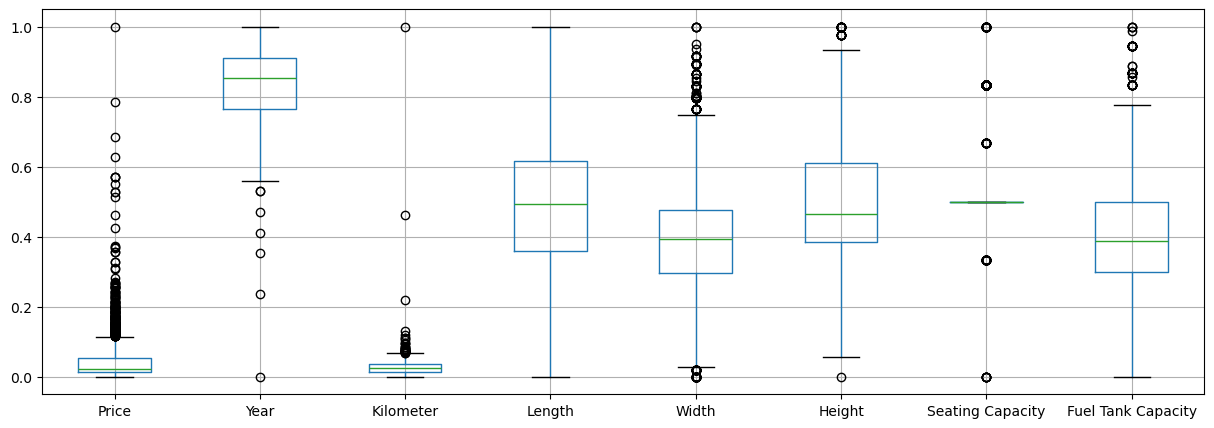

In [19]:
df_fill.boxplot(figsize=(15,5)) # se observa mejor la distribucion de los datos
plt.show()

In [20]:
df_fill.to_csv('datasets/CarDekho_filled_normalize.csv', index=False)
df_not_null.to_csv('datasets/CarDekho_not_null_normalize.csv', index=False)